In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# import the necessary packages

In [47]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 150)

In [48]:
def removeArtifacts(data, original):
    for col in data.select_dtypes(include='object').columns:
        data[col] = data[col].where(data[col].isin(original[col].unique()), np.nan)
# remove categorical artifacts

In [49]:
def handleOriginal(original):
    original["Depression"] = (original["Depression"] == "Yes")

In [50]:
data = pd.read_csv("train.csv")
original = pd.read_csv("original.csv")

handleOriginal(original)
removeArtifacts(data, original)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140443 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140602 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104020 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [52]:
data.isna().sum().sort_values(ascending=False)

Study Satisfaction                       112803
Academic Pressure                        112803
CGPA                                     112802
Profession                                36680
Work Pressure                             27918
Job Satisfaction                          27910
Name                                        257
Degree                                      116
City                                         98
Sleep Duration                               79
Dietary Habits                               27
Financial Stress                              4
Have you ever had suicidal thoughts ?         0
Family History of Mental Illness              0
Work/Study Hours                              0
id                                            0
Working Professional or Student               0
Age                                           0
Gender                                        0
Depression                                    0
dtype: int64

In [53]:
def show_missing_values(data, palette="viridis"):
    missing_values = data.isna().sum().sort_values(ascending=False)
    sns.barplot(x=missing_values.values, y=missing_values.index,palette=palette)

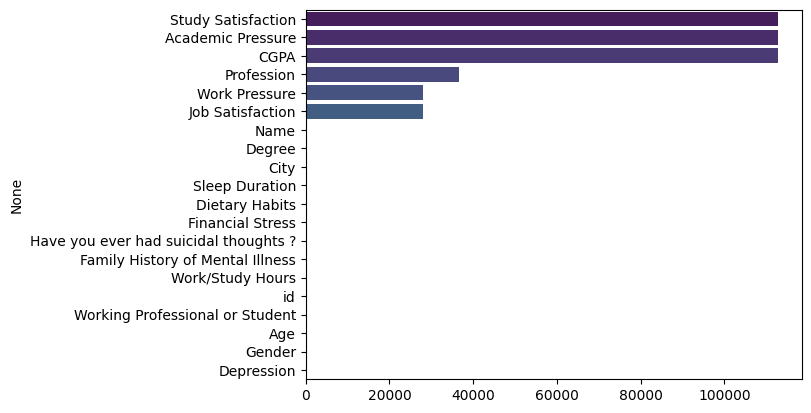

In [54]:
show_missing_values(data)

<Axes: ylabel='Count'>

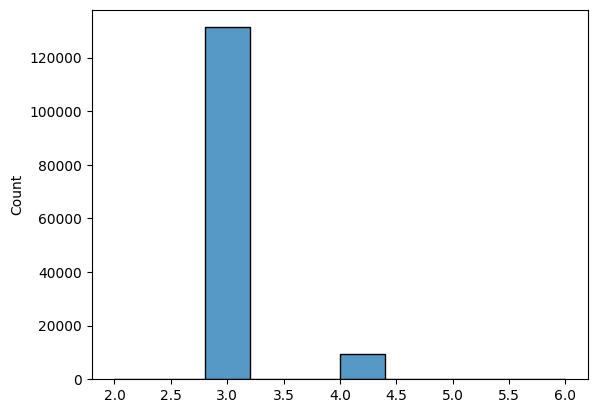

In [55]:
sns.histplot(data.isnull().sum(axis=1), bins=10)

<Axes: >

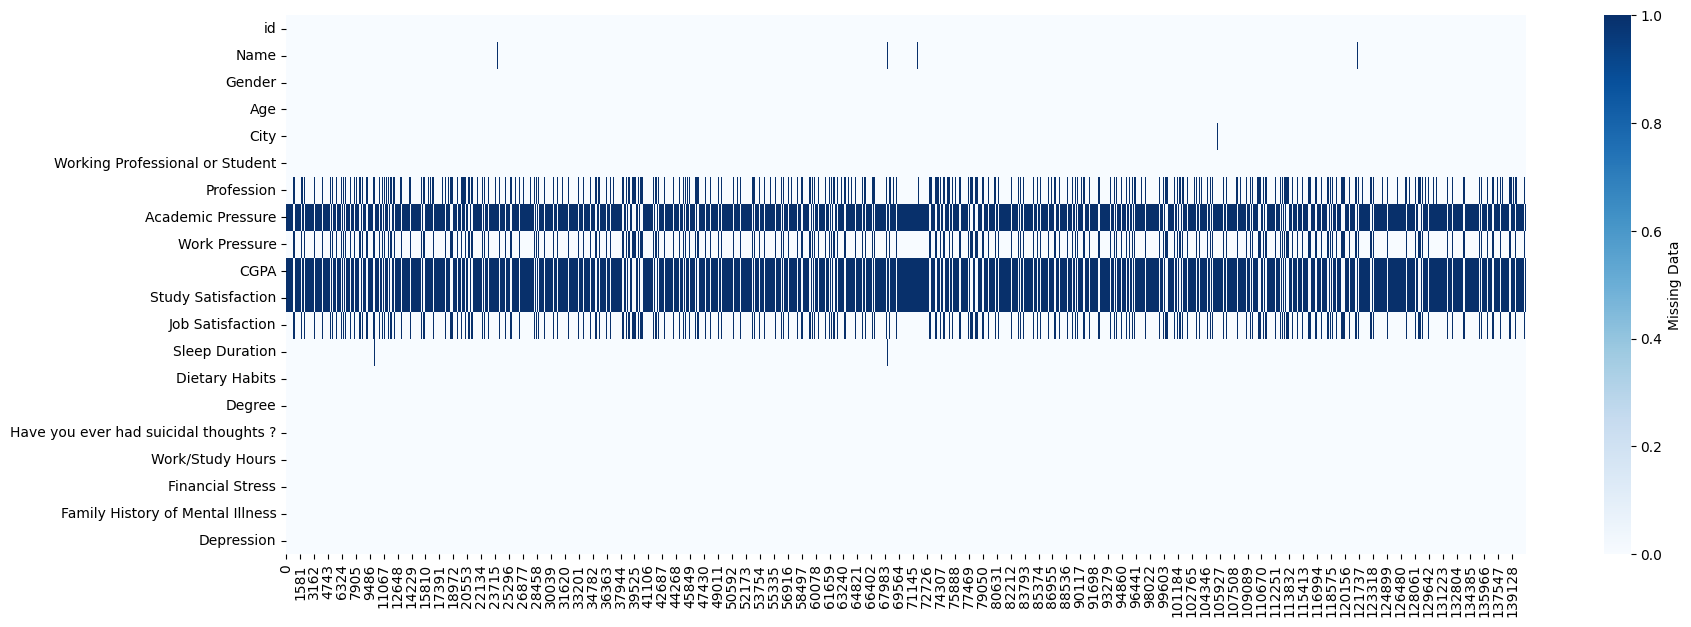

In [56]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data.isna().transpose(),cbar_kws={'label': 'Missing Data'},cmap="Blues",ax=ax)

Most missing values have 2 or more if missing value exists within the row. Likely, the columns are correlated with each other in some way.

<Axes: xlabel='Depression', ylabel='count'>

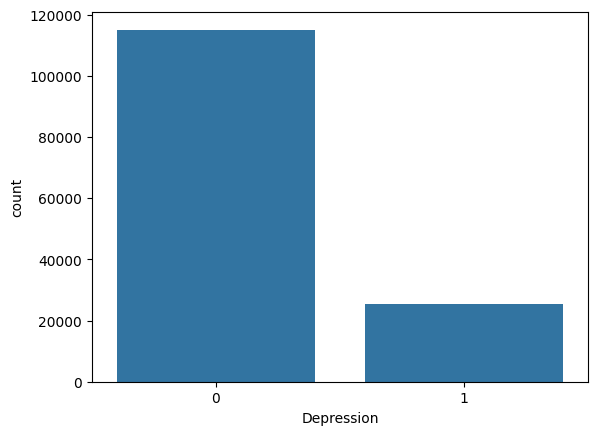

In [57]:
sns.countplot(data, x="Depression")

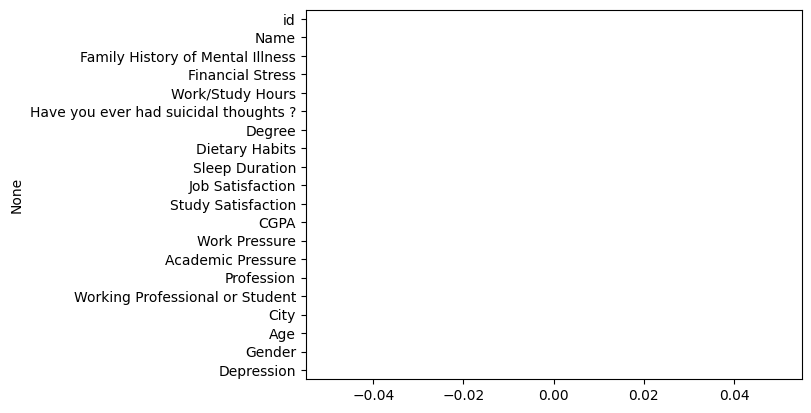

In [58]:
data = data.fillna("Unknown") # fill all with unknown
show_missing_values(data)

<Axes: xlabel='Work/Study Hours', ylabel='count'>

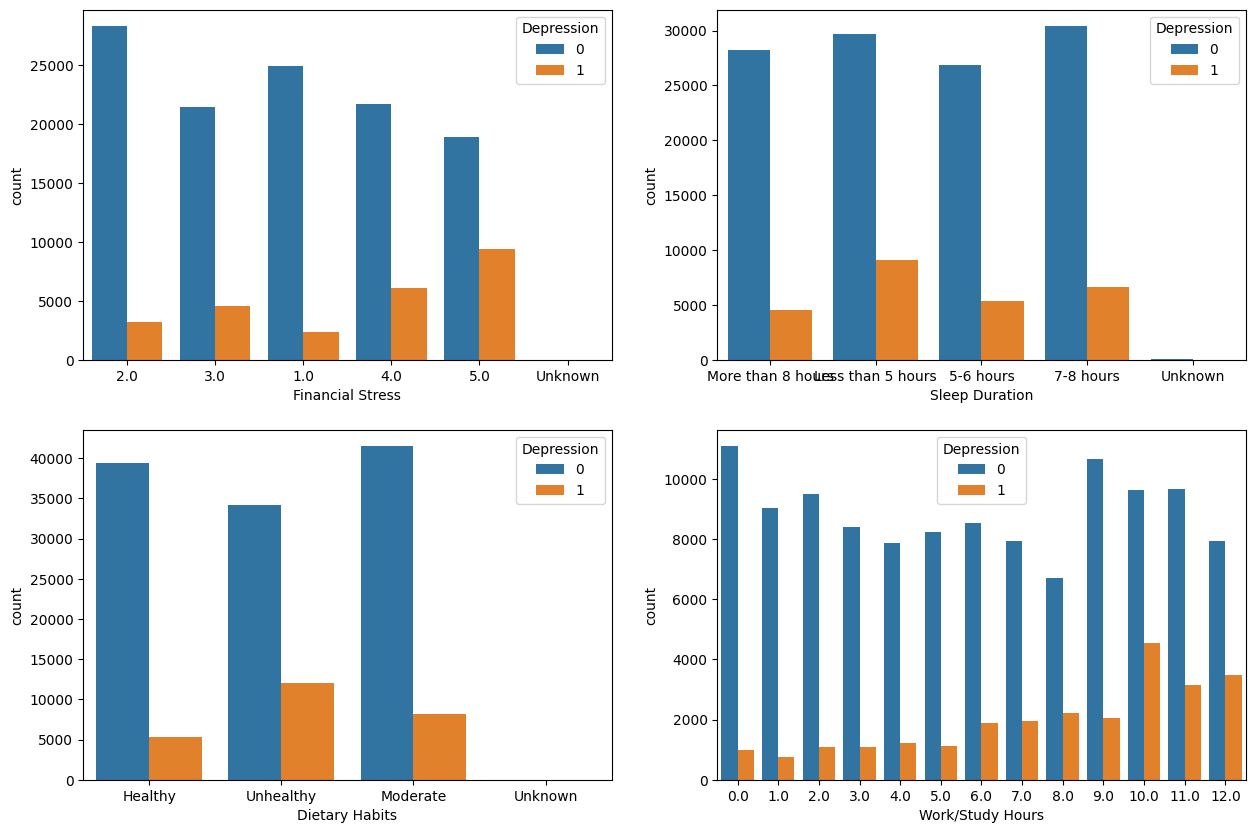

In [59]:
fig, axes=plt.subplots(ncols=2,nrows=2,figsize=(15,10))

sns.countplot(data,x="Financial Stress",hue="Depression",ax=axes[0][0])
sns.countplot(data,x="Sleep Duration",hue="Depression",ax=axes[0][1])
sns.countplot(data,x="Dietary Habits",hue="Depression",ax=axes[1][0])
sns.countplot(data,x="Work/Study Hours",hue="Depression",ax=axes[1][1])

<Axes: xlabel='Work Pressure', ylabel='count'>

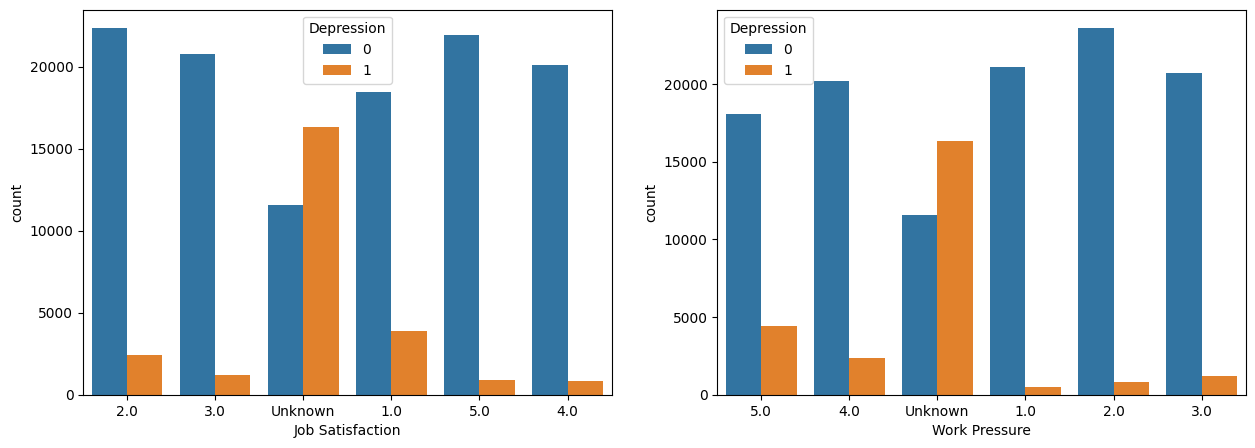

In [60]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data,x="Job Satisfaction",hue="Depression",ax=axes[0])
sns.countplot(data,x="Work Pressure",hue="Depression",ax=axes[1])

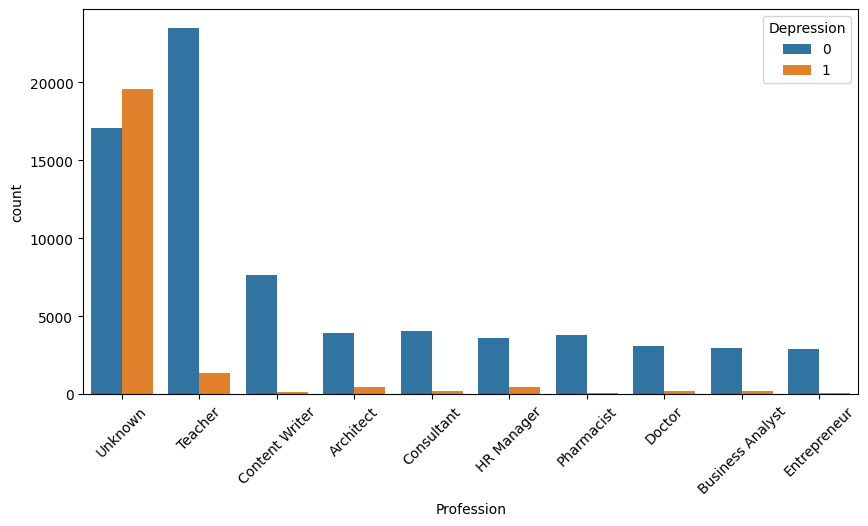

In [61]:
fig, axs = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
sns.countplot(data,x="Profession",hue="Depression",order=data["Profession"].value_counts().iloc[:10].index,ax=axs)
axs.tick_params(axis='x', rotation=45)

<Axes: xlabel='CGPA', ylabel='Count'>

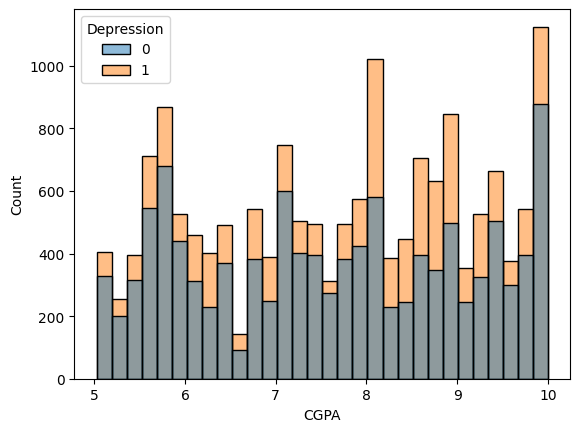

In [62]:
sns.histplot(data[data["CGPA"]!="Unknown"],x="CGPA",hue="Depression",bins=30)

<Axes: xlabel='Study Satisfaction', ylabel='count'>

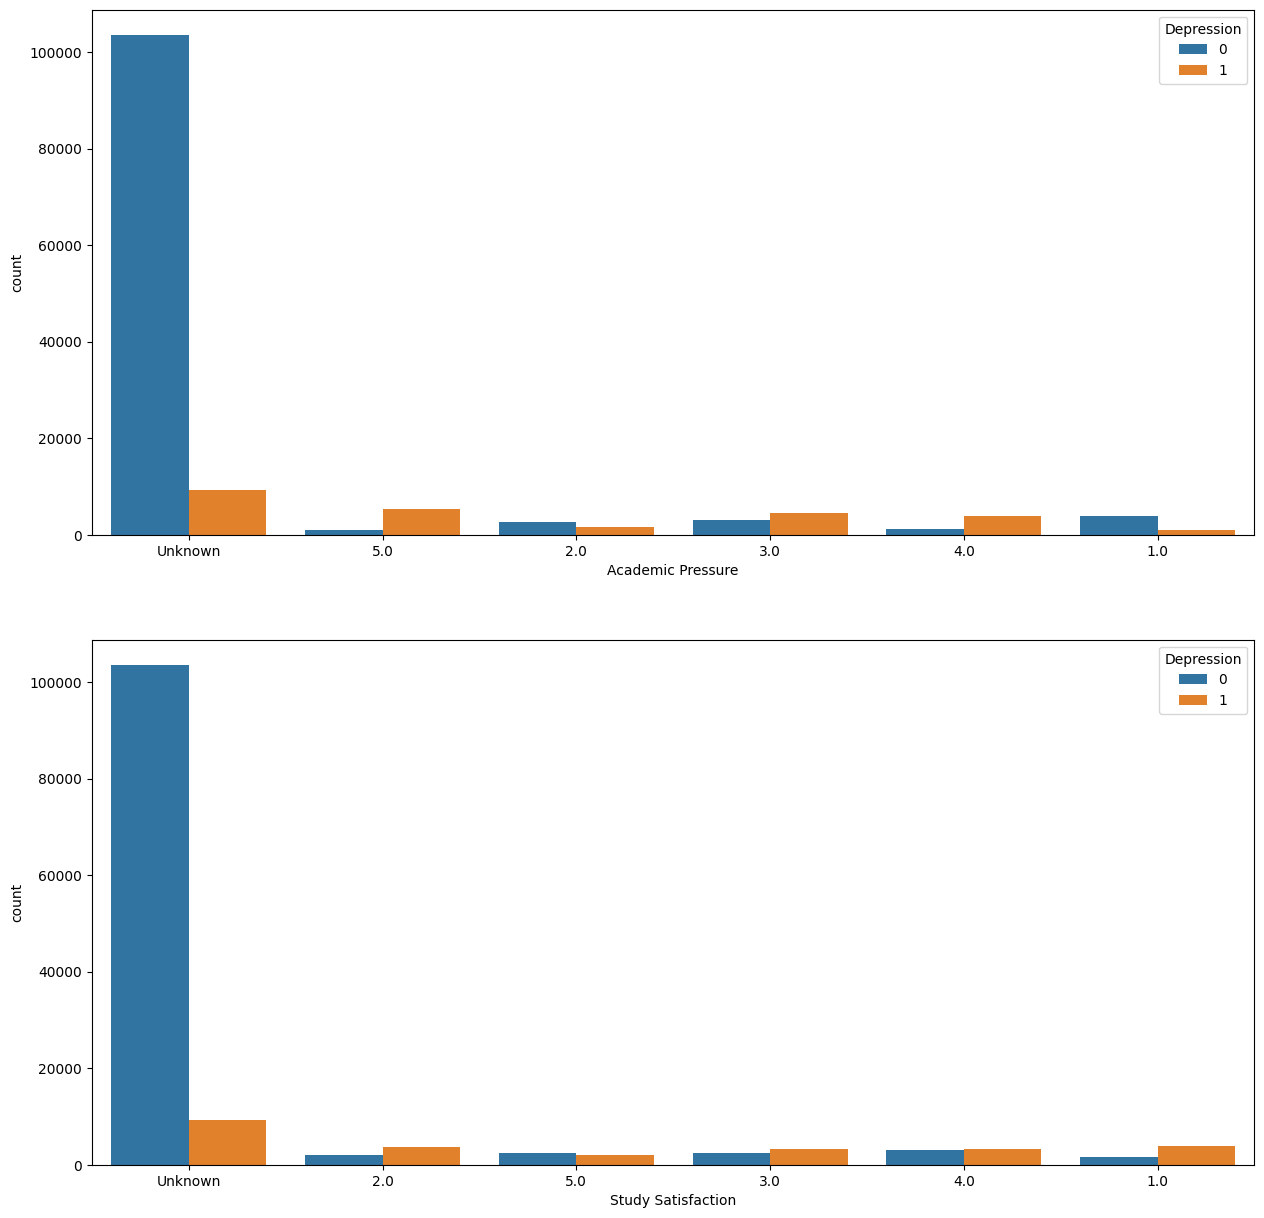

In [63]:
fig, axs = plt.subplots(ncols=1, nrows=2,figsize=(15,15))
sns.countplot(data,x="Academic Pressure",hue="Depression",ax=axs[0])
sns.countplot(data,x="Study Satisfaction",hue="Depression",ax=axs[1])

<Axes: xlabel='Work Pressure', ylabel='count'>

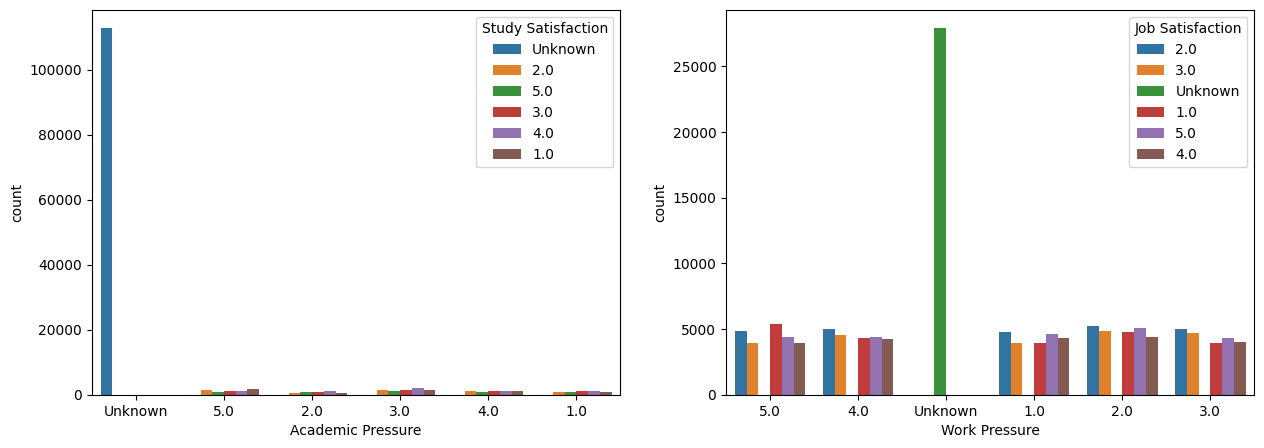

In [64]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.countplot(data,x="Academic Pressure",hue="Study Satisfaction",ax=axs[0])
sns.countplot(data,x="Work Pressure",hue="Job Satisfaction",ax=axs[1])

<Axes: xlabel='Age', ylabel='Count'>

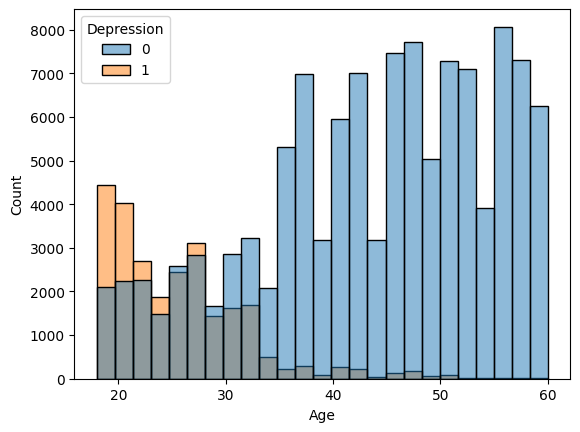

In [65]:
sns.histplot(data,x="Age",bins=25,hue="Depression")

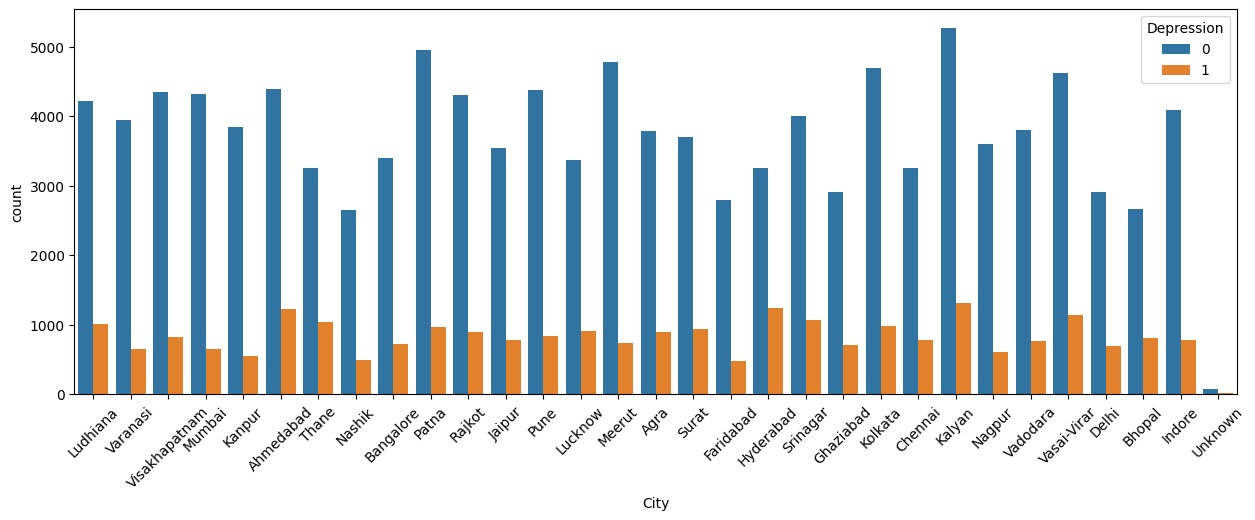

In [66]:
fig,axes=plt.subplots(figsize=(15,5))
sns.countplot(data,x="City",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)

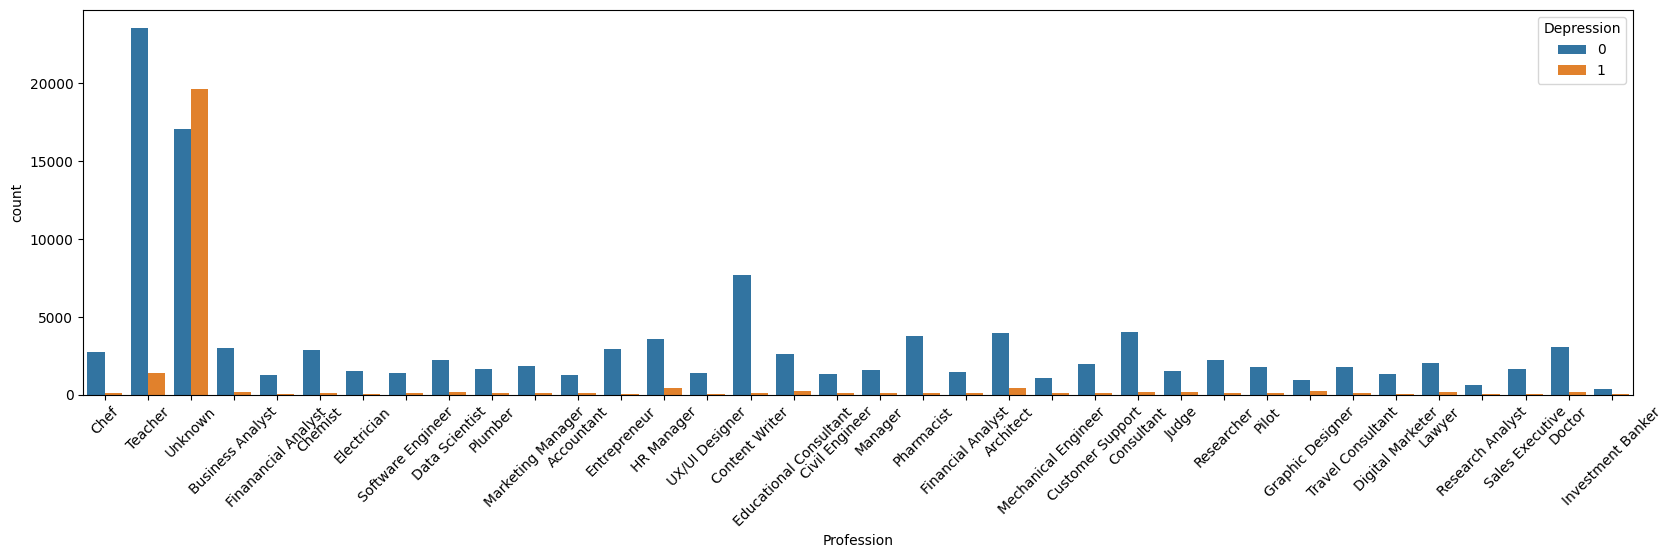

In [67]:
fig,axes=plt.subplots(figsize=(20,5))
sns.countplot(data,x="Profession",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)

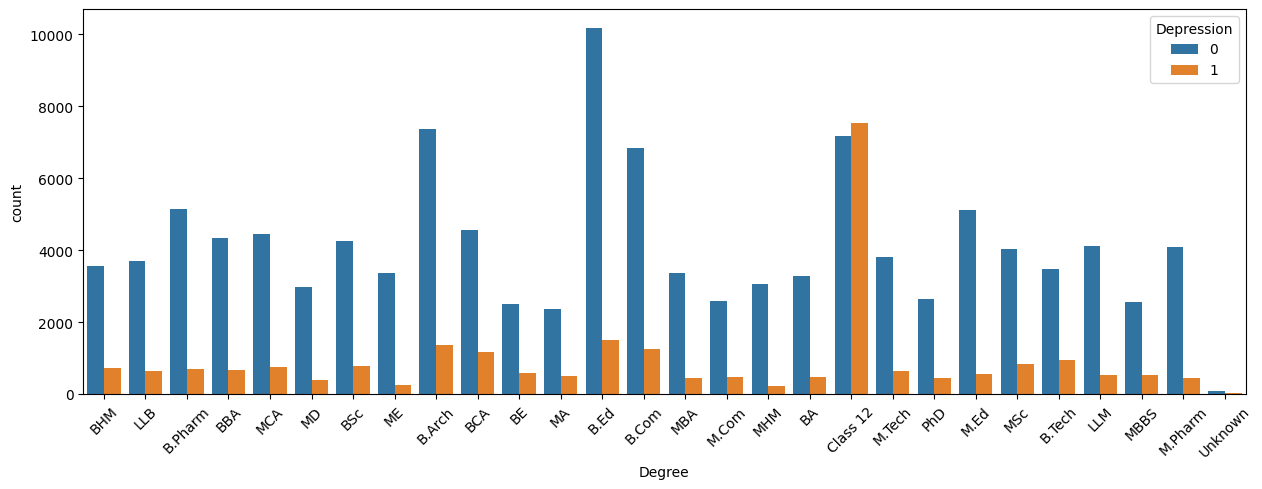

In [68]:
fig,axes=plt.subplots(figsize=(15,5))
sns.countplot(data,x="Degree",hue="Depression",ax=axes)
axes.tick_params(axis='x', rotation=45)